#### Model Deplopment
* Learning Objectives
    1. Simple and Multiples Linear Regression
    2. Model Evaluation using Visualization
    3. Polynomial Regression and Pipelines
    4. R-squared and MSE for In-Sample Evaluation
    5. Prediction and Decision Making
* A model can be thounght of a mathematical equation used to predict a value given one or more other values
* Relating one or more independent variables to dependent variables
* Usually the more relevant data you have the more accurate your model is.


### Linear Regression and Multiople Linear Regression
* Linear regression will refer to one independent variable to make a prediction
* Multiple Linear Regression will refer to multiple independent variables to make a prediction

#### Simple linear regresssion  - SLR
1. The predictor (independent) variable - x
2. The target ( dependent ) variable  - y
$$
y = {b_0} + {b_1}x
$$
* where
    * ${b_0}$ : the intercept
    * ${b_1}$: the slope


In [23]:
import pandas as pd
import numpy as np
 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

df1 = df.replace('?', np.nan)

df = df1.dropna( axis=0)


In [24]:
# Import linearr_model from scikit-learn
from sklearn.linear_model import LinearRegression
# Create a Linear Regression Object using the constructor
lm = LinearRegression()
# We define the predictor variable and target variable
X = df[['highway-mpg']]
Y = df['price']

# Then use  lm.fit(X,Y) to fit the model, i.e find the paramenters b0 and b1
lm.fit(X,Y)
# we can obtain a prediction
Yhat = lm.predict(X)

In [25]:
# We can view the intercept (b0)
print(lm.intercept_)
# view the slope (b1)
print(lm.coef_)
# The Relationship between Price and Highway MPG is given by
# Price = 38423.31  821.73 * highway-mpg


32468.309406002
[-655.28135573]


###  Multiple Linear Regression (MLR)
This method is used to explain the relationship between
    * One continuous target (Y) variable
    * Two or more predictor (X) variables
    $$
    Y = 1 + 2{x_1} + 3{x_2}
    $$
    * The variables ${x_1}$ and ${x_2}$ can be visualized adn a 2D plane.

In [30]:
# We can extract the for 4 predictor variables and store them in the variables Z
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# Then train the model as before
#X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

# we can also obtain a prediction
Yhat = lm.predict(Z)

In [31]:
# Find the intercet (b0)
print(lm.intercept_)
# Find the coefficints (b1,b2,b3,b4)
print(lm.coef_)


-15469.047120325753
[20.35983585  8.25411089 33.01845058 22.20517885]


### Model Eveluation Using Visualization
* Regression plot
    * The relationship between two variables
    * The strength of the correltion
    * The direction of the relationship (positve or negative)
    


In [ ]:
import seaborn as sns
import matplotlib as plt
sns.regplot(x="highway-mpg", y="price", data=df)
sns.residplot(df['highway-mpg'],df['price'])

C:\Users\joseg\AppData\Local\Temp\ipykernel_57068\770318367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\joseg\AppData\Local\Temp\ipykernel_57068\770318367.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

<Axes: xlabel='price', ylabel='Density'>

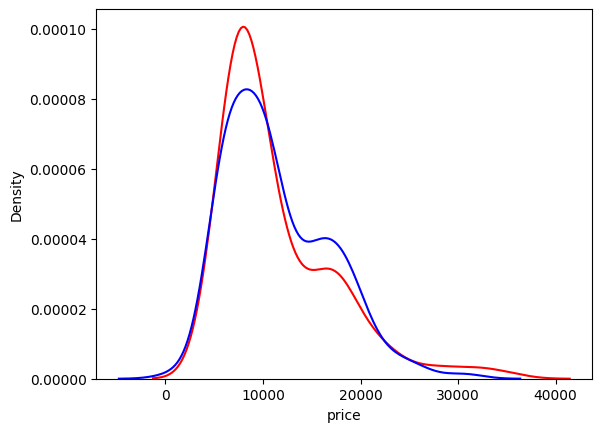

In [35]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

#### Polynomial Regression and Pipelines
* A special case of the general linear regression model
* Useful for describing curvilinear relationship
* _curvilienar relationship_: By squaring or setting higher-order terms of the perdictor variables
'

In [ ]:
# Calculate polynomial of 3 order
f = np.polyfit(X,Y,3)
p = np.polyld(f)
# we can print out the model
print(p)

We can also have multi dimentional polynomial linear regression
* The "preprocessing" library in scikit-learn


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2, include_bias=False)
#x_polly=pr.fit_transform(x[['horsepower', 'curb-weight']])

### Measures for In-Sample Evaluation
* A way to numerically determine how good the model fits on dataset.
* Two important measures to determine the fit of a model
    * Mean Squared Error (MSE)
    * R-squareed (R^2)
        * The Coefficient of Determination or R squared (R^2)
        * Is a measure to determine how close the data is to the fitted regression line
        * R^2: the percentage of variation of the target variable (Y) that is explained by the liear model.
        

#### Decision making: Determining a good model fit
To determine final best fit
* Do the predicted values make sense
* Visualization
* Numerical measures for evaluation
* Comparieng models


In [ ]:
# First we train the model 
lm.fit(df['highway-mpg'], df['prices'])
# Let's predict the price of a car with 30 highway-mpg
lm.predict(np.array(30.0).reshape(-1,1))